# **Customer Churn Prediction Project**

## 🧪 Step 0: Setup

📊 Customer Churn Modeling: Complete Real-World Guide

🎯 Understanding Churn Modeling

What is Customer Churn?

   * Definition : When customers stop doing business with a company
   * Types : Voluntary churn, involuntary churn, competitive churn
   * Importance : Retaining customers is 5-25x cheaper than acquiring new ones
     

# Step 1: Setting Up Your Environment

---


First, let's install and import all necessary libraries:

In [ ]:
import pandas as pd  # ✅ Importing pandas library for data manipulation and analysis

# ✅ Load the dataset into a pandas DataFrame
# 'Churn_Modelling.csv' is the file containing customer churn data
# Make sure this CSV file is in the same working directory or provide the full path

Step 2: Let’s Load & Explore the Data

In [ ]:
df = pd.read_csv('/content/Tel_Dataset.csv')

# ✅ Display the first 5 rows of the dataset
# Helps to quickly inspect the structure of the data, column names, and sample values
df.head()

,PID,CRM_PID_Value_Segment,EffectiveSegment,Billing_ZIP,KA_name,Active_subscribers,Not_Active_subscribers,Suspended_subscribers,Total_SUBs,AvgMobileRevenue,AvgFIXRevenue,TotalRevenue,ARPU,CHURN
0,123759242,Bronze,SOHO,6000.0,VM,2,NaN,NaN,2,40.17,0.0,40.17,NaN,No
1,126145737,Bronze,SOHO,6400.0,VM,3,NaN,NaN,3,40.17,0.0,40.17,13.39,No
2,123506355,Bronze,SOHO,6000.0,DI,2,3.0,NaN,5,40.17,0.0,40.17,20.09,No
3,112595585,Bronze,SOHO,4400.0,MT,1,2.0,NaN,3,40.17,0.0,40.17,40.17,No
4,115097935,Iron,SOHO,4000.0,AD,2,1.0,NaN,3,40.17,0.0,40.17,20.09,No


# Step 2: Let’s Load & Explore the Data

In [ ]:
import os
print(os.getcwd())  # Check current working directory


/content


In [ ]:
df.head(10)  # First 10 rows


,PID,CRM_PID_Value_Segment,EffectiveSegment,Billing_ZIP,KA_name,Active_subscribers,Not_Active_subscribers,Suspended_subscribers,Total_SUBs,AvgMobileRevenue,AvgFIXRevenue,TotalRevenue,ARPU,CHURN
0,123759242,Bronze,SOHO,6000.0,VM,2,NaN,NaN,2,40.17,0.0,40.17,NaN,No
1,126145737,Bronze,SOHO,6400.0,VM,3,NaN,NaN,3,40.17,0.0,40.17,13.39,No
2,123506355,Bronze,SOHO,6000.0,DI,2,3.0,NaN,5,40.17,0.0,40.17,20.09,No
3,112595585,Bronze,SOHO,4400.0,MT,1,2.0,NaN,3,40.17,0.0,40.17,40.17,No
4,115097935,Iron,SOHO,4000.0,AD,2,1.0,NaN,3,40.17,0.0,40.17,20.09,No
5,108684074,Gold,VSE,6600.0,RJ,2,11.0,NaN,13,40.17,0.0,40.17,20.09,No
6,112504678,Bronze,SOHO,4644.0,MT,4,NaN,NaN,4,40.33,0.0,40.33,10.08,Yes
7,833121152,Iron,SOHO,6100.0,VM,5,2.0,NaN,7,40.33,0.0,40.33,8.07,No
8,123654309,Iron,SOHO,6100.0,DI,3,NaN,NaN,3,40.33,0.0,40.33,13.44,No
9,123688980,Bronze,SOHO,6280.0,AD?,1,NaN,NaN,1,40.33,0.0,40.33,40.33,No


In [ ]:
df.tail()    # Last 5 rows

,PID,CRM_PID_Value_Segment,EffectiveSegment,Billing_ZIP,KA_name,Active_subscribers,Not_Active_subscribers,Suspended_subscribers,Total_SUBs,AvgMobileRevenue,AvgFIXRevenue,TotalRevenue,ARPU,CHURN
8448,115901902,Iron,SOHO,4000.0,VU,2,1.0,NaN,3,56.5,0.0,56.5,28.25,No
8449,115800273,Bronze,SOHO,4006.0,VU,5,NaN,NaN,5,56.5,0.0,56.5,11.30,No
8450,160049889,Bronze,SOHO,4003.0,VU,3,1.0,NaN,4,56.5,0.0,56.5,18.83,No
8451,160095203,Bronze,SOHO,4023.0,VU,3,NaN,NaN,3,56.5,0.0,56.5,18.83,Yes
8452,200026545,Bronze,SOHO,4002.0,VU,4,4.0,NaN,8,56.5,0.0,56.5,14.13,No


In [ ]:
df.columns

Index(['PID', 'CRM_PID_Value_Segment', 'EffectiveSegment', 'Billing_ZIP',
       'KA_name', 'Active_subscribers', 'Not_Active_subscribers',
       'Suspended_subscribers', 'Total_SUBs', 'AvgMobileRevenue ',
       'AvgFIXRevenue', 'TotalRevenue', 'ARPU', 'CHURN'],
      dtype='object')

# Step 3: Basic Data Checks

In [ ]:
# ✅ Check the overall structure of the dataset
# - Displays number of rows & columns
# - Shows each column name, data type (int, float, object, etc.)
# - Reveals if there are any missing (null) values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8453 entries, 0 to 8452
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PID                     8453 non-null   object 
 1   CRM_PID_Value_Segment   8448 non-null   object 
 2   EffectiveSegment        8453 non-null   object 
 3   Billing_ZIP             8451 non-null   float64
 4   KA_name                 8453 non-null   object 
 5   Active_subscribers      8453 non-null   int64  
 6   Not_Active_subscribers  4304 non-null   float64
 7   Suspended_subscribers   352 non-null    float64
 8   Total_SUBs              8453 non-null   int64  
 9   AvgMobileRevenue        8453 non-null   float64
 10  AvgFIXRevenue           8453 non-null   float64
 11  TotalRevenue            8453 non-null   float64
 12  ARPU                    8452 non-null   float64
 13  CHURN                   8453 non-null   object 
dtypes: float64(7), int64(2), object(5)
memor

In [ ]:
# ✅ Get quick statistical summary for all numeric columns
# - count, mean, standard deviation, min, max, and quartiles (25%, 50%, 75%)
# - Useful for spotting outliers or unusual values
df.describe()

,Billing_ZIP,Active_subscribers,Not_Active_subscribers,Suspended_subscribers,Total_SUBs,AvgMobileRevenue,AvgFIXRevenue,TotalRevenue,ARPU
count,8451.000000,8453.000000,4304.000000,352.000000,8453.000000,8453.000000,8453.000000,8453.000000,8452.000000
mean,4879.727725,7.774636,4.163336,1.576705,9.960132,148.011956,0.821185,148.833141,24.441789
std,1061.095394,6.680524,9.462847,1.979905,10.246648,102.570539,11.737880,103.250779,22.820585
min,1000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.670000,0.000000
25%,4003.000000,4.000000,1.000000,1.000000,5.000000,71.500000,0.000000,71.830000,14.070000
50%,4400.000000,6.000000,2.000000,1.000000,7.000000,113.170000,0.000000,113.670000,19.315000
75%,6000.000000,10.000000,4.000000,1.000000,12.000000,191.170000,0.000000,192.330000,27.255000
max,9644.000000,110.000000,214.000000,22.000000,235.000000,499.830000,480.500000,499.830000,462.830000


In [ ]:
# Neater!
df.describe().round(2)

,Billing_ZIP,Active_subscribers,Not_Active_subscribers,Suspended_subscribers,Total_SUBs,AvgMobileRevenue,AvgFIXRevenue,TotalRevenue,ARPU
count,8451.00,8453.00,4304.00,352.00,8453.00,8453.00,8453.00,8453.00,8452.00
mean,4879.73,7.77,4.16,1.58,9.96,148.01,0.82,148.83,24.44
std,1061.10,6.68,9.46,1.98,10.25,102.57,11.74,103.25,22.82
min,1000.00,1.00,1.00,1.00,1.00,0.00,0.00,4.67,0.00
25%,4003.00,4.00,1.00,1.00,5.00,71.50,0.00,71.83,14.07
50%,4400.00,6.00,2.00,1.00,7.00,113.17,0.00,113.67,19.31
75%,6000.00,10.00,4.00,1.00,12.00,191.17,0.00,192.33,27.26
max,9644.00,110.00,214.00,22.00,235.00,499.83,480.50,499.83,462.83


In [ ]:
# ✅ Check class distribution: how many customers churned vs stayed
# - Returns the count of each unique value in the 'CHURN' column
# - Example: 0 = Not churned, 1 = Churned (depends on dataset encoding)
df['CHURN'].value_counts()

,count
CHURN,
No,7904
Yes,549


In [ ]:
# ✅ Check class distribution: how many customers churned vs stayed
# - Returns the count of each unique value in the 'CHURN' column
# - Example: 0 = Not churned, 1 = Churned (depends on dataset encoding)
df['CHURN'].value_counts(dropna=False)

,count
CHURN,
No,7904
Yes,549


<Axes: xlabel='CHURN'>

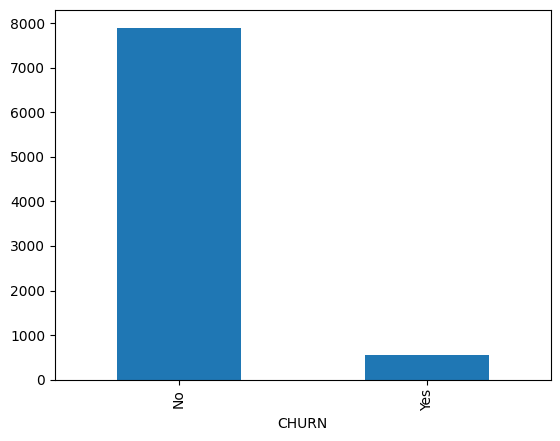

In [ ]:
df['CHURN'].value_counts().plot(kind='bar')


<Axes: ylabel='count'>

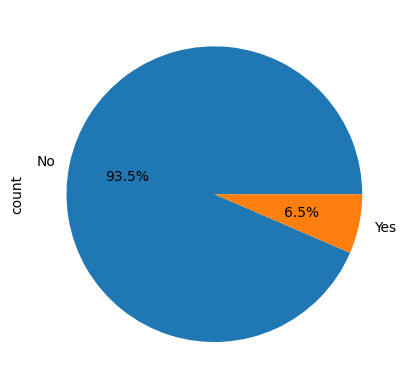

In [ ]:
df['CHURN'].value_counts().plot.pie(autopct="%1.1f%%")


In [ ]:
# ✅ Check percentage distribution of churned vs not churned customers
# - normalize=True converts counts to proportions (0 to 1)
# - Multiply by 100 if you want percentages instead of proportions
df['CHURN'].value_counts(normalize=True)


,proportion
CHURN,
No,0.935053
Yes,0.064947


In [ ]:
# Neater!
df['CHURN'].value_counts(normalize=True).round(2)*100

,proportion
CHURN,
No,94.0
Yes,6.0


In [ ]:
df.sample(n=5,random_state=110)


,PID,CRM_PID_Value_Segment,EffectiveSegment,Billing_ZIP,KA_name,Active_subscribers,Not_Active_subscribers,Suspended_subscribers,Total_SUBs,AvgMobileRevenue,AvgFIXRevenue,TotalRevenue,ARPU,CHURN
5220,200908077,Bronze,SOHO,4400.0,MT,8,3.0,NaN,11,79.00,0.0,79.00,9.88,No
8114,200757272,Bronze,SOHO,4330.0,VU,1,NaN,NaN,1,47.83,0.0,47.83,47.83,No
4312,115866533,Gold,VSE,4000.0,AD,18,NaN,1.0,19,265.00,0.0,265.00,14.72,No
2672,836145824,Gold,VSE,6300.0,AD?,6,NaN,NaN,6,136.50,0.0,136.50,22.75,No
4518,115247057,Gold,VSE,4003.0,VU,18,2.0,1.0,21,294.00,0.0,294.00,16.33,No


In [ ]:
percentage= df['CHURN'].value_counts(normalize=True)
(percentage * 100).round(2)

,proportion
CHURN,
No,93.51
Yes,6.49


In [ ]:
print("Shape:", df.shape)


Shape: (8453, 14)


# Data Overview – Missing Values & Dtypes

In [ ]:
# ✅ Check data types and overall structure of the dataset
# - Shows the number of non-null (non-missing) entries for each column
# - Displays data types (int64, float64, object, etc.)
# - Helps to quickly identify potential data cleaning needs
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8453 entries, 0 to 8452
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PID                     8453 non-null   object 
 1   CRM_PID_Value_Segment   8448 non-null   object 
 2   EffectiveSegment        8453 non-null   object 
 3   Billing_ZIP             8451 non-null   float64
 4   KA_name                 8453 non-null   object 
 5   Active_subscribers      8453 non-null   int64  
 6   Not_Active_subscribers  4304 non-null   float64
 7   Suspended_subscribers   352 non-null    float64
 8   Total_SUBs              8453 non-null   int64  
 9   AvgMobileRevenue        8453 non-null   float64
 10  AvgFIXRevenue           8453 non-null   float64
 11  TotalRevenue            8453 non-null   float64
 12  ARPU                    8452 non-null   float64
 13  CHURN                   8453 non-null   object 
dtypes: float64(7), int64(2), object(5)
memor

In [ ]:
df.isnull()

,PID,CRM_PID_Value_Segment,EffectiveSegment,Billing_ZIP,KA_name,Active_subscribers,Not_Active_subscribers,Suspended_subscribers,Total_SUBs,AvgMobileRevenue,AvgFIXRevenue,TotalRevenue,ARPU,CHURN
0,False,False,False,False,False,False,True,True,False,False,False,False,True,False
1,False,False,False,False,False,False,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8448,False,False,False,False,False,False,False,True,False,False,False,False,False,False
8449,False,False,False,False,False,False,True,True,False,False,False,False,False,False
8450,False,False,False,False,False,False,False,True,False,False,False,False,False,False
8451,False,False,False,False,False,False,True,True,False,False,False,False,False,False


In [ ]:
# ✅ Check the total count of missing (null) values in each column
# - Returns the number of null values per column
# - Useful for deciding how to handle missing data (drop, fill, or impute)
df.isnull().sum()

,0
PID,0
CRM_PID_Value_Segment,5
EffectiveSegment,0
Billing_ZIP,2
KA_name,0
Active_subscribers,0
Not_Active_subscribers,4149
Suspended_subscribers,8101
Total_SUBs,0
AvgMobileRevenue,0


In [ ]:
df.isnull().sum().sum() # total number of missing values

np.int64(12258)

In [ ]:
# ✅ Check missing values as a percentage
(df.isnull().sum() / len(df) * 100).round(2)


,0
PID,0.00
CRM_PID_Value_Segment,0.06
EffectiveSegment,0.00
Billing_ZIP,0.02
KA_name,0.00
Active_subscribers,0.00
Not_Active_subscribers,49.08
Suspended_subscribers,95.84
Total_SUBs,0.00
AvgMobileRevenue,0.00


In [ ]:
df.isnull().values.any()  # True if any missing value exists


np.True_

# STEP 3: Target Encoding (CHURN → 0/1)

In [ ]:
df.head()

,PID,CRM_PID_Value_Segment,EffectiveSegment,Billing_ZIP,KA_name,Active_subscribers,Not_Active_subscribers,Suspended_subscribers,Total_SUBs,AvgMobileRevenue,AvgFIXRevenue,TotalRevenue,ARPU,CHURN
0,123759242,Bronze,SOHO,6000.0,VM,2,NaN,NaN,2,40.17,0.0,40.17,NaN,No
1,126145737,Bronze,SOHO,6400.0,VM,3,NaN,NaN,3,40.17,0.0,40.17,13.39,No
2,123506355,Bronze,SOHO,6000.0,DI,2,3.0,NaN,5,40.17,0.0,40.17,20.09,No
3,112595585,Bronze,SOHO,4400.0,MT,1,2.0,NaN,3,40.17,0.0,40.17,40.17,No
4,115097935,Iron,SOHO,4000.0,AD,2,1.0,NaN,3,40.17,0.0,40.17,20.09,No


In [ ]:
df.tail()

,PID,CRM_PID_Value_Segment,EffectiveSegment,Billing_ZIP,KA_name,Active_subscribers,Not_Active_subscribers,Suspended_subscribers,Total_SUBs,AvgMobileRevenue,AvgFIXRevenue,TotalRevenue,ARPU,CHURN
8448,115901902,Iron,SOHO,4000.0,VU,2,1.0,NaN,3,56.5,0.0,56.5,28.25,No
8449,115800273,Bronze,SOHO,4006.0,VU,5,NaN,NaN,5,56.5,0.0,56.5,11.30,No
8450,160049889,Bronze,SOHO,4003.0,VU,3,1.0,NaN,4,56.5,0.0,56.5,18.83,No
8451,160095203,Bronze,SOHO,4023.0,VU,3,NaN,NaN,3,56.5,0.0,56.5,18.83,Yes
8452,200026545,Bronze,SOHO,4002.0,VU,4,4.0,NaN,8,56.5,0.0,56.5,14.13,No


In [ ]:
# ✅ Convert categorical 'CHURN' column (Yes/No) into numeric (0/1)
# - 'No'  → 0 (customer did NOT churn)
# - 'Yes' → 1 (customer churned)
# - This encoding is necessary because machine learning models work with numbers, not strings
df['CHURN'] = df['CHURN'].map({'No': 0, 'Yes': 1})

In [ ]:
print(df['CHURN'].unique())


[0 1]


In [ ]:
df['CHURN']

,CHURN
0,0
1,0
2,0
3,0
4,0
...,...
8448,0
8449,0
8450,0
8451,1


In [ ]:
# Convert target column to binary
df['CHURN'].value_counts()

,count
CHURN,
0,7904
1,549


In [ ]:
df['CHURN']

,CHURN
0,0
1,0
2,0
3,0
4,0
...,...
8448,0
8449,0
8450,0
8451,1


In [ ]:
df['CHURN'] = df['CHURN'].astype(int)


In [ ]:
df['CHURN'].dtype

dtype('int64')

# STEP 4: Fill Missing Values

In [ ]:
# ✅ Fill missing values (NaNs) in numeric columns based on business logic:
# - For 'Not_Active_subscribers' and 'Suspended_subscribers', missing values are filled with 0
#   because it likely means there were no inactive or suspended subscribers recorded for those entries.
# - For 'ARPU' (Average Revenue Per User), missing values are filled with the median value of the column
#   to avoid skewing the data, since median is robust to outliers.
df['Not_Active_subscribers'] = df['Not_Active_subscribers'].fillna(0)
df['Suspended_subscribers'] = df['Suspended_subscribers'].fillna(0)
df['ARPU'] = df['ARPU'].fillna(df['ARPU'].median())

In [ ]:
# Check for missing (NaN) values in specific columns:
# 'Not_Active_subscribers', 'Suspended_subscribers', and 'ARPU'
# .isna() returns True for NaN values, and .sum() counts how many NaNs are in each column
df[['Not_Active_subscribers', 'Suspended_subscribers', 'ARPU']].isna().sum()


,0
Not_Active_subscribers,0
Suspended_subscribers,0
ARPU,0


In [ ]:
df = df.dropna(subset=['CRM_PID_Value_Segment', 'Billing_ZIP'])



In [ ]:
df.isna().sum()

,0
PID,0
CRM_PID_Value_Segment,0
EffectiveSegment,0
Billing_ZIP,0
KA_name,0
Active_subscribers,0
Not_Active_subscribers,0
Suspended_subscribers,0
Total_SUBs,0
AvgMobileRevenue,0


# STEP 5: Exploratory Data Analysis (EDA)

## 📊 Churn Distribution



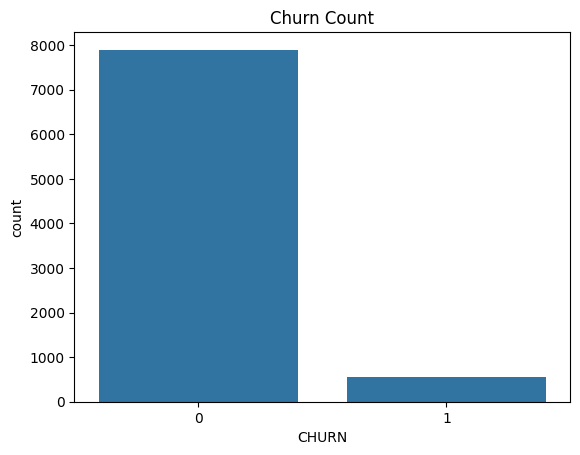

In [ ]:
# Import visualization libraries:
# seaborn (sns) for easy, beautiful statistical plots
# matplotlib.pyplot (plt) for controlling plot display and customization
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot to show the number of customers who churned vs. those who didn't
# - x='CHURN' specifies the categorical variable to count
# - data=df uses the DataFrame containing the data
sns.countplot(x='CHURN', data=df)

# Add a title to the plot for clarity
plt.title("Churn Count")

# Display the plot in the output
plt.show()


/tmp/ipython-input-42-1035036181.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='CHURN', data=df, palette='Set2')


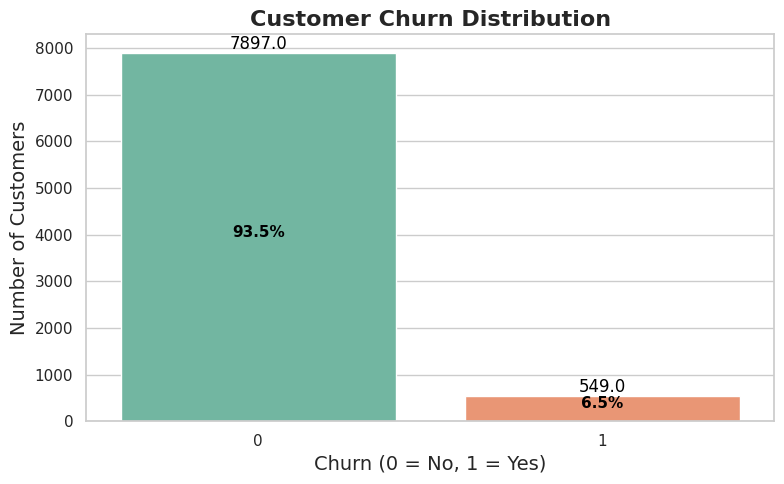

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a clean and professional style for plots
sns.set(style="whitegrid")

# Create a count plot for the 'CHURN' column
plt.figure(figsize=(8,5))  # Set figure size for better visibility

ax = sns.countplot(x='CHURN', data=df, palette='Set2')

# Add count labels on top of each bar for precise info
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')

# Add title and axis labels with styling
plt.title("Customer Churn Distribution", fontsize=16, weight='bold')
plt.xlabel("Churn (0 = No, 1 = Yes)", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)

# Optional: show percentage share on plot (if desired)
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = height / total * 100
    ax.text(p.get_x() + p.get_width() / 2, height * 0.5, f'{percentage:.1f}%',
            ha='center', color='black', fontsize=11, weight='bold')

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


## 📊 Churn by Value Segment

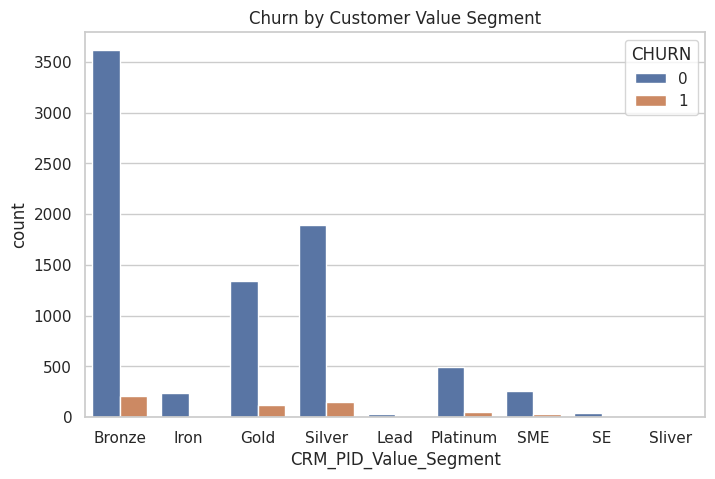

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size for better plot visibility
plt.figure(figsize=(8,5))

# Create a count plot to show number of customers by 'CRM_PID_Value_Segment'
# with bars colored by churn status ('CHURN') to compare churn across segments
sns.countplot(x='CRM_PID_Value_Segment', hue='CHURN', data=df)

# Add a title to the plot
plt.title("Churn by Customer Value Segment")

# Show the plot
plt.show()


/tmp/ipython-input-44-2640072043.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='CHURN', data=df, palette='Set2')


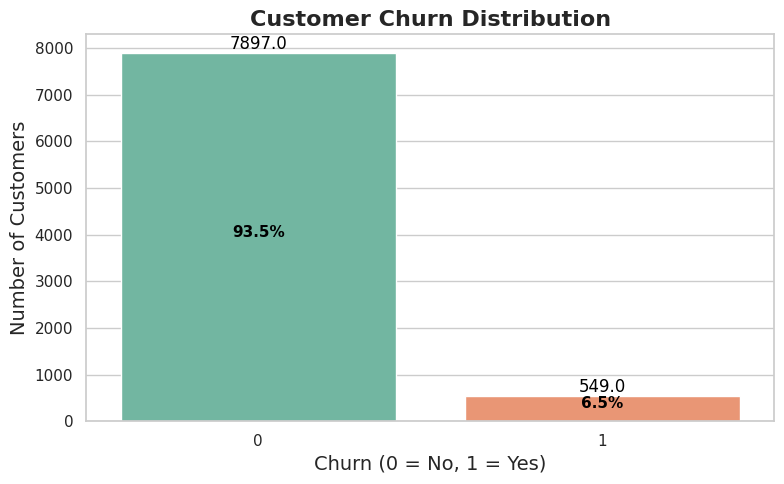

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Set a clean and professional style for plots
sns.set(style="whitegrid")  # white background + grid lines (good for reading values)

# ✅ Create a new figure (canvas) and set its size
plt.figure(figsize=(8,5))  # width=8, height=5 inches → bigger & clearer chart

# ✅ Draw a count plot for the 'CHURN' column
# x='CHURN' → 0 = No churn, 1 = Yes churn
# data=df → uses our dataframe
# palette='Set2' → soft, nice colors
ax = sns.countplot(x='CHURN', data=df, palette='Set2')

# ✅ Add the exact count on top of each bar
for p in ax.patches:
    height = p.get_height()  # how tall the bar is (the count)
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2, height),  # position = center, top of bar
                ha='center', va='bottom', fontsize=12, color='black')

# ✅ Add title and axis labels
plt.title("Customer Churn Distribution", fontsize=16, weight='bold')  # big bold title
plt.xlabel("Churn (0 = No, 1 = Yes)", fontsize=14)  # x-axis label
plt.ylabel("Number of Customers", fontsize=14)  # y-axis label

# ✅ (Optional) Add percentage inside each bar
total = len(df)  # total number of customers in dataset
for p in ax.patches:
    height = p.get_height()
    percentage = height / total * 100  # convert count to %
    ax.text(p.get_x() + p.get_width() / 2, height * 0.5,  # middle of bar
            f'{percentage:.1f}%',  # show 1 decimal (e.g., 34.5%)
            ha='center', color='black', fontsize=11, weight='bold')

# ✅ Adjust layout & show plot
plt.tight_layout()  # prevents text from cutting off
plt.show()  # displays the final chart


## 📊 Churn by ARPU (Boxplot)

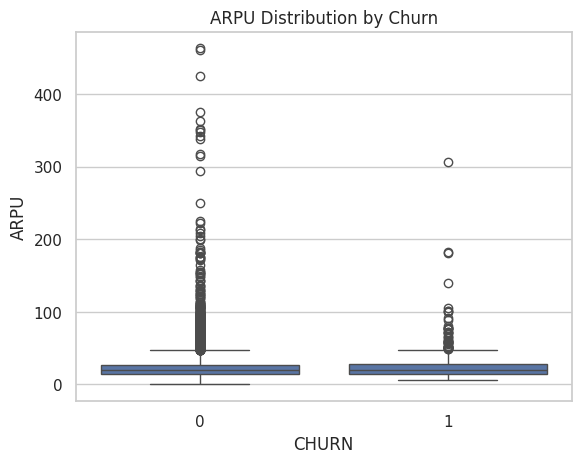

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot to compare the distribution of 'ARPU' across 'CHURN' categories
# - x='CHURN': categorical variable on x-axis (e.g., churn = 0 or 1)
# - y='ARPU': numeric variable on y-axis to visualize distribution
sns.boxplot(x='CHURN', y='ARPU', data=df)

# Add a title for clarity
plt.title("ARPU Distribution by Churn")

# Show the plot
plt.show()


/tmp/ipython-input-46-4189852386.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='CHURN', y='ARPU', data=df, palette='Set2')


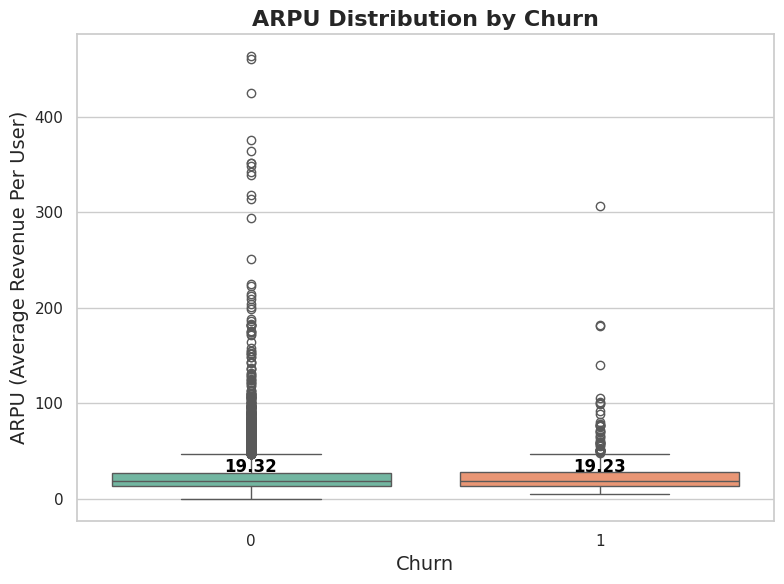

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a clean style for the plot
sns.set(style="whitegrid")

plt.figure(figsize=(8,6))  # Set figure size for better readability

# Draw boxplot showing ARPU distribution for churned vs non-churned customers
ax = sns.boxplot(x='CHURN', y='ARPU', data=df, palette='Set2')

# Add title with styling
plt.title("ARPU Distribution by Churn", fontsize=16, weight='bold')

# Label axes with font size for clarity
plt.xlabel("Churn", fontsize=14)
plt.ylabel("ARPU (Average Revenue Per User)", fontsize=14)

# Optional: Add median values on the plot for quick reference
medians = df.groupby('CHURN')['ARPU'].median().values
for tick, median in enumerate(medians):
    ax.text(tick, median + (max(df['ARPU']) * 0.02), f'{median:.2f}',
            horizontalalignment='center', size='medium', color='black', weight='semibold')

plt.tight_layout()
plt.show()


## STEP 6: Feature Encoding (Categorical → Numeric)

In [ ]:
# ✅ One-hot encode (convert) categorical columns into numeric dummy variables
df_encoded = pd.get_dummies(
    df,  # original dataframe
    columns=[
        'CRM_PID_Value_Segment',  # categorical column 1
        'EffectiveSegment',       # categorical column 2
        'KA_name'                 # categorical column 3
    ],
    drop_first=True  # drops the first category in each column to avoid dummy variable trap (multicollinearity)
)


In [ ]:
print(df_encoded.columns)


Index(['PID', 'Billing_ZIP', 'Active_subscribers', 'Not_Active_subscribers',
       'Suspended_subscribers', 'Total_SUBs', 'AvgMobileRevenue ',
       'AvgFIXRevenue', 'TotalRevenue', 'ARPU', 'CHURN',
       'CRM_PID_Value_Segment_Gold', 'CRM_PID_Value_Segment_Iron',
       'CRM_PID_Value_Segment_Lead', 'CRM_PID_Value_Segment_Platinum',
       'CRM_PID_Value_Segment_SE', 'CRM_PID_Value_Segment_SME',
       'CRM_PID_Value_Segment_Silver', 'CRM_PID_Value_Segment_Sliver',
       'EffectiveSegment_Other', 'EffectiveSegment_SE', 'EffectiveSegment_SME',
       'EffectiveSegment_SOHO', 'EffectiveSegment_VSE', 'KA_name_AD?',
       'KA_name_DI', 'KA_name_Daniela Stefanova', 'KA_name_Ginka Vachkova',
       'KA_name_Jenia Gogova', 'KA_name_MT', 'KA_name_RJ',
       'KA_name_Tatiana Trifonova', 'KA_name_VM', 'KA_name_VT', 'KA_name_VU'],
      dtype='object')


In [ ]:
df_encoded.head()

,PID,Billing_ZIP,Active_subscribers,Not_Active_subscribers,Suspended_subscribers,Total_SUBs,AvgMobileRevenue,AvgFIXRevenue,TotalRevenue,ARPU,...,KA_name_DI,KA_name_Daniela Stefanova,KA_name_Ginka Vachkova,KA_name_Jenia Gogova,KA_name_MT,KA_name_RJ,KA_name_Tatiana Trifonova,KA_name_VM,KA_name_VT,KA_name_VU
0,123759242,6000.0,2,0.0,0.0,2,40.17,0.0,40.17,19.315,...,False,False,False,False,False,False,False,True,False,False
1,126145737,6400.0,3,0.0,0.0,3,40.17,0.0,40.17,13.390,...,False,False,False,False,False,False,False,True,False,False
2,123506355,6000.0,2,3.0,0.0,5,40.17,0.0,40.17,20.090,...,True,False,False,False,False,False,False,False,False,False
3,112595585,4400.0,1,2.0,0.0,3,40.17,0.0,40.17,40.170,...,False,False,False,False,True,False,False,False,False,False
4,115097935,4000.0,2,1.0,0.0,3,40.17,0.0,40.17,20.090,...,False,False,False,False,False,False,False,False,False,False


# STEP 7: Modeling

In [ ]:

# Prepare the features (X) by dropping target and unwanted columns from the dataset
X = df_encoded.drop(['CHURN', 'PID'], axis=1)  # Remove 'CHURN' (target) and 'PID' (identifier) columns from features

In [ ]:
X

,Billing_ZIP,Active_subscribers,Not_Active_subscribers,Suspended_subscribers,Total_SUBs,AvgMobileRevenue,AvgFIXRevenue,TotalRevenue,ARPU,CRM_PID_Value_Segment_Gold,...,KA_name_DI,KA_name_Daniela Stefanova,KA_name_Ginka Vachkova,KA_name_Jenia Gogova,KA_name_MT,KA_name_RJ,KA_name_Tatiana Trifonova,KA_name_VM,KA_name_VT,KA_name_VU
0,6000.0,2,0.0,0.0,2,40.17,0.0,40.17,19.315,False,...,False,False,False,False,False,False,False,True,False,False
1,6400.0,3,0.0,0.0,3,40.17,0.0,40.17,13.390,False,...,False,False,False,False,False,False,False,True,False,False
2,6000.0,2,3.0,0.0,5,40.17,0.0,40.17,20.090,False,...,True,False,False,False,False,False,False,False,False,False
3,4400.0,1,2.0,0.0,3,40.17,0.0,40.17,40.170,False,...,False,False,False,False,True,False,False,False,False,False
4,4000.0,2,1.0,0.0,3,40.17,0.0,40.17,20.090,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8448,4000.0,2,1.0,0.0,3,56.50,0.0,56.50,28.250,False,...,False,False,False,False,False,False,False,False,False,True
8449,4006.0,5,0.0,0.0,5,56.50,0.0,56.50,11.300,False,...,False,False,False,False,False,False,False,False,False,True
8450,4003.0,3,1.0,0.0,4,56.50,0.0,56.50,18.830,False,...,False,False,False,False,False,False,False,False,False,True
8451,4023.0,3,0.0,0.0,3,56.50,0.0,56.50,18.830,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
# Prepare the target variable (y) which we want to predict
y = df_encoded['CHURN']  # 'CHURN' column is the label we want to predict

In [ ]:
y

,CHURN
0,0
1,0
2,0
3,0
4,0
...,...
8448,0
8449,0
8450,0
8451,1


In [ ]:
from sklearn.model_selection import train_test_split  # Import the function to split data into training and testing sets

# Split the data into training and testing sets
# test_size=0.2 means 20% of data is for testing, 80% for training
# random_state=42 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Logistic Regression (Baseline)

In [ ]:
print(X_train.isna().sum())  # shows how many missing values in each column


Billing_ZIP                       0
Active_subscribers                0
Not_Active_subscribers            0
Suspended_subscribers             0
Total_SUBs                        0
AvgMobileRevenue                  0
AvgFIXRevenue                     0
TotalRevenue                      0
ARPU                              0
CRM_PID_Value_Segment_Gold        0
CRM_PID_Value_Segment_Iron        0
CRM_PID_Value_Segment_Lead        0
CRM_PID_Value_Segment_Platinum    0
CRM_PID_Value_Segment_SE          0
CRM_PID_Value_Segment_SME         0
CRM_PID_Value_Segment_Silver      0
CRM_PID_Value_Segment_Sliver      0
EffectiveSegment_Other            0
EffectiveSegment_SE               0
EffectiveSegment_SME              0
EffectiveSegment_SOHO             0
EffectiveSegment_VSE              0
KA_name_AD?                       0
KA_name_DI                        0
KA_name_Daniela Stefanova         0
KA_name_Ginka Vachkova            0
KA_name_Jenia Gogova              0
KA_name_MT                  

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Logistic Regression model
# max_iter=1000 increases the max number of iterations to help model converge
model = LogisticRegression(max_iter=1000)

# Train (fit) the model on the training data (features X_train and labels y_train)
model.fit(X_train, y_train)

# Use the trained model to predict labels for the test data (X_test)
y_pred = model.predict(X_test)

# Print the confusion matrix to see true vs predicted class counts
print(confusion_matrix(y_test, y_pred))

# Print a detailed classification report: precision, recall, f1-score, support for each class
print(classification_report(y_test, y_pred))


[[1581    0]
 [ 109    0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1581
           1       0.00      0.00      0.00       109

    accuracy                           0.94      1690
   macro avg       0.47      0.50      0.48      1690
weighted avg       0.88      0.94      0.90      1690



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Create a machine learning pipeline that combines preprocessing and modeling steps
pipeline = Pipeline([
    # Step 1: StandardScaler scales the features so they have mean=0 and std=1
    # This helps Logistic Regression converge faster and perform better
    ('scaler', StandardScaler()),

    # Step 2: LogisticRegression model with increased max_iter to ensure convergence
    ('model', LogisticRegression(max_iter=2000))
])

# Train the pipeline on training data: this fits the scaler and trains the logistic regression model
pipeline.fit(X_train, y_train)

# Use the trained pipeline to predict labels on the test set
y_pred = pipeline.predict(X_test)


In [ ]:
# Initialize Logistic Regression model
# max_iter=2000: allow more iterations to help the model converge properly
# class_weight='balanced': adjust weights to handle imbalanced classes automatically
model = LogisticRegression(max_iter=2000, class_weight='balanced')


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Create a pipeline that scales features then trains Logistic Regression with balanced class weights
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize features to mean=0 and std=1
    ('model', LogisticRegression(max_iter=2000, class_weight='balanced'))
    # Step 2: Logistic Regression with more iterations and balanced weights to handle class imbalance
])

# Fit the pipeline on the training data (scaling + model training combined)
pipeline.fit(X_train, y_train)

# Predict labels on the test set using the trained pipeline
y_pred = pipeline.predict(X_test)

# Print confusion matrix: shows counts of true vs predicted classes
print(confusion_matrix(y_test, y_pred))

# Print detailed classification metrics: precision, recall, f1-score for each class
print(classification_report(y_test, y_pred))


[[1004  577]
 [  54   55]]
              precision    recall  f1-score   support

           0       0.95      0.64      0.76      1581
           1       0.09      0.50      0.15       109

    accuracy                           0.63      1690
   macro avg       0.52      0.57      0.45      1690
weighted avg       0.89      0.63      0.72      1690

